In [19]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\canoz\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [20]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [21]:
dataFrame=pd.read_csv("dataset/merc.csv")

In [22]:
dataFrame.head() # ilk 5 veriye göz atalım 

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325.0,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20.0,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,NaN,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325.0,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325.0,30.1,4.0


VERİYİ ANLAMAK

In [23]:
dataFrame.describe()  #datasetin özet özelliklerine bakma 

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13118.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.939777,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.157167,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


##### std özelliği standart sapma özelliği fazla bir veri yani veri aralığı geniş çok pahalı da var ucuz da var 

### toplam kaç tane satırda hangi değerlerde null değerler var bunları sayısını bulmak için

In [24]:
dataFrame.isnull().sum()  

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             1
mpg             0
engineSize      0
dtype: int64

GRAFİKSEL ANALİZLER

<Figure size 100x500 with 0 Axes>

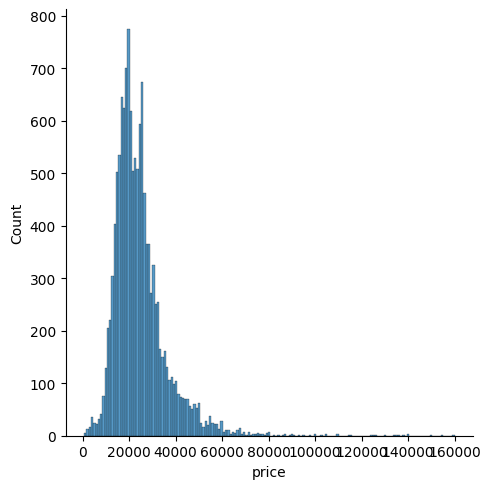

In [34]:
plt.figure(figsize=(1,5))
sbn.displot(dataFrame["price"])

veri seti 150000 fiyatına doğru az bir araba var bu veriyi yanlış yönlendirebilir 
her iki yönü de değerlendirmek gerekir hem çıkartarak hemde çıkarmayarak ne kadar iyi olduğuna bakılmalı 